<a href="https://colab.research.google.com/github/kkmcgg/signals/blob/main/kkmc_optimal_transport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade POT

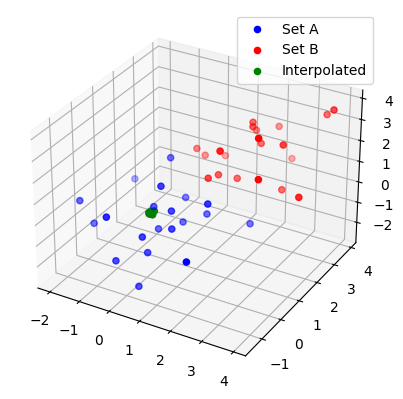

In [ ]:
import numpy as np
import ot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generating two sets of 3D points
np.random.seed(0)
n_points = 20
A = np.random.randn(n_points, 3)  # First set
B = np.random.randn(n_points, 3) + 2  # Second set (shifted)

# Uniform weights for each distribution
a, b = np.ones((n_points,)) / n_points, np.ones((n_points,)) / n_points

# Cost matrix: Euclidean distance
M = ot.dist(A, B, metric='euclidean')

# Compute the optimal transport plan using the EMD (Earth Mover's Distance) solver
G = ot.emd(a, b, M)

# Interpolation
t = 0.5  # Interpolation parameter (0.5 for midpoint)
interpolated_points = (1 - t) * A.T.dot(G) + t * B.T.dot(G)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Original sets
ax.scatter(A[:, 0], A[:, 1], A[:, 2], color='blue', label='Set A')
ax.scatter(B[:, 0], B[:, 1], B[:, 2], color='red', label='Set B')
# Interpolated set
ax.scatter(interpolated_points[0], interpolated_points[1], interpolated_points[2], color='green', label='Interpolated')

ax.legend()
plt.show()


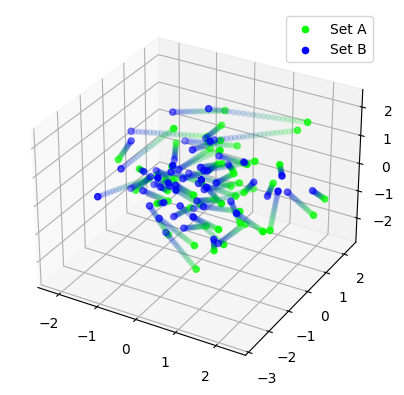

In [60]:
import numpy as np
import ot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generating two sets of 3D points
np.random.seed(0)
n_points = 60
A = np.random.randn(n_points, 3)  # First set
B = np.random.randn(n_points, 3) #+ 2  # Second set (shifted)

# Uniform weights for each distribution
a, b = np.ones((n_points,)) / n_points, np.ones((n_points,)) / n_points

# Cost matrix: Euclidean distance
M = ot.dist(A, B, metric='euclidean')
# M = ot.dist(A, B, metric='Wasserstein')

# Compute the optimal transport plan using the EMD (Earth Mover's Distance) solver
G = ot.emd(a, b, M)

def interpolate_points(t=0.5, G=G, A=A, B=B, n_points=n_points):
  # Interpolation
  # t = 0.5  # Interpolation parameter (0.5 for midpoint)
  interpolated_points = np.zeros((n_points * n_points, 3))  # Adjusting size for clarity
  index = 0

  # Creating interpolated points
  for i in range(n_points):
      for j in range(n_points):
          if G[i, j] > 0:  # Only consider positive transports
              interpolated_points[index] = (1 - t) * A[i] + t * B[j]
              index += 1
  return interpolated_points

interpolated_points = interpolate_points()



# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Original sets
ax.scatter(A[:, 0], A[:, 1], A[:, 2],
           color=(0, 1, 0),
          #  color=(0, 0, 0),
           label='Set A')
ax.scatter(B[:, 0], B[:, 1], B[:, 2],
           color=(0, 0, 1),
          #  color=(0, 0, 0),
           label='Set B')
# Interpolated set
# ax.scatter(interpolated_points[:, 0], interpolated_points[:, 1], interpolated_points[:, 2], color='black', label='Interpolated')


# interpolated_points_p25 = interpolate_points(t=.25)
# ax.scatter(interpolated_points_p25[:, 0], interpolated_points_p25[:, 1], interpolated_points_p25[:, 2], color=(0, 1-.25, 0+.25), label='p25', )
# interpolated_points_p75 = interpolate_points(t=.75)
# ax.scatter(interpolated_points_p75[:, 0], interpolated_points_p75[:, 1], interpolated_points_p75[:, 2], color=(0, 1-.75, 0+.75), label='p75')

def plot_interpolated_points(t):
  interpolated_points_t = interpolate_points(t)
  ax.scatter(interpolated_points_t[:, 0], interpolated_points_t[:, 1], interpolated_points_t[:, 2], color=(0, 1-t, 0+t),alpha=.2, linewidth=0)

for i in np.arange(0,1,.05):
  # print(i)
  plot_interpolated_points(i)

ax.legend()
plt.show()


from example https://pythonot.github.io/auto_examples/plot_OT_1D_smooth.html#sphx-glr-auto-examples-plot-ot-1d-smooth-py

In [61]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

In [140]:
n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
a += gauss(n, m=5, s=5)
b = gauss(n, m=60, s=10)
b+=gauss(n, m=25, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

In [213]:
a2= (a-b)/(a+b)
b2= (b-a)/(a+b)

a2= (a-np.roll(a,12))/(a+np.roll(a,12))
b2= (b-np.roll(b,12))/(b+np.roll(b,12))

a2=a2/a2.sum()*2
b2=b2/b2.sum()*2
# a=a2
# b=b2


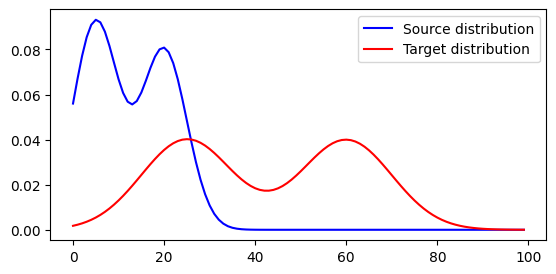

In [142]:
pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

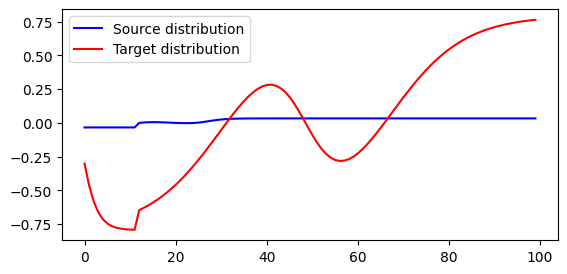

In [214]:
pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a2, 'b', label='Source distribution')
pl.plot(x, b2, 'r', label='Target distribution')
pl.legend()

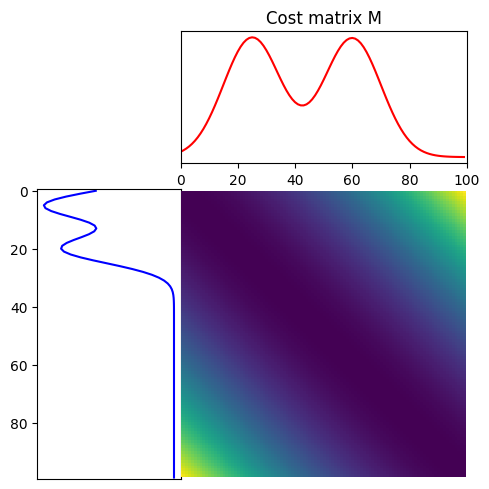

In [215]:
pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, 'Cost matrix M')

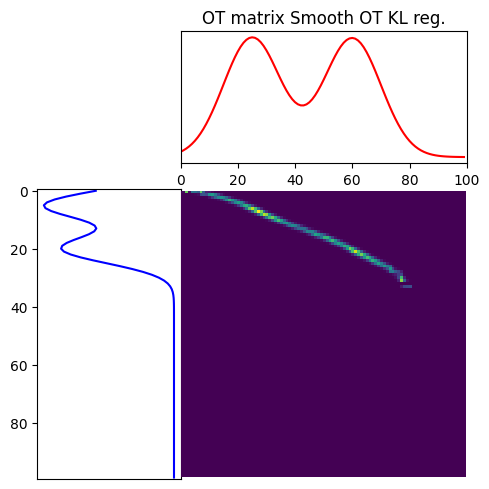

In [216]:
lambd = 2e-4
Gsm = ot.smooth.smooth_ot_dual(a, b, M, lambd, reg_type='kl')
# lambd = 1e-1
# Gsm = ot.smooth.smooth_ot_dual(a, b, M, lambd, reg_type='l2')

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gsm, 'OT matrix Smooth OT KL reg.')

pl.show()

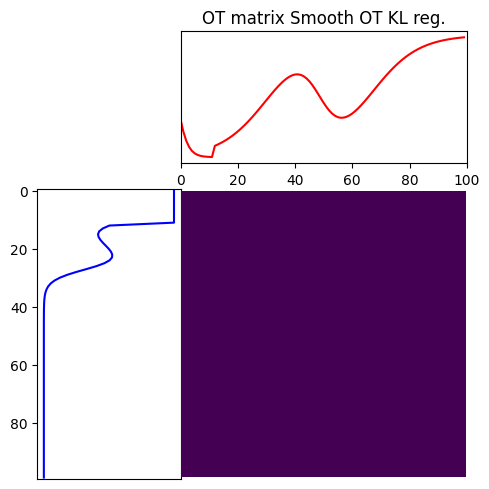

In [217]:
lambd = 1e-2
Gsm = ot.smooth.smooth_ot_dual(a2, b2, M, lambd, reg_type='kl')

# lambd = 1e-10
# Gsm = ot.smooth.smooth_ot_dual(a2, b2, M, lambd, reg_type='l2')

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a2, b2, Gsm, 'OT matrix Smooth OT KL reg.')

pl.show()

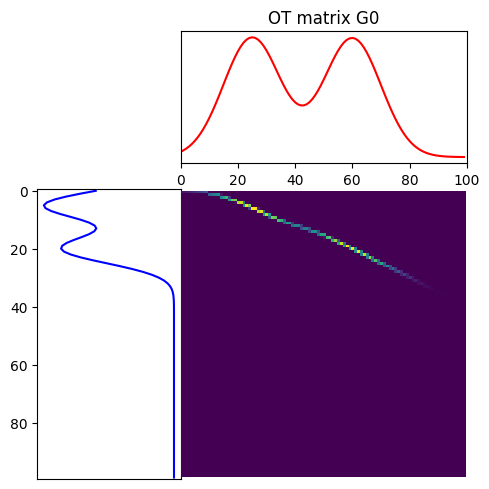

In [223]:
# use fast 1D solver
# G0 = ot.emd_1d(x, x, a, b)

# Equivalent to
G0 = ot.emd(a, b, M)

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G0, 'OT matrix G0')

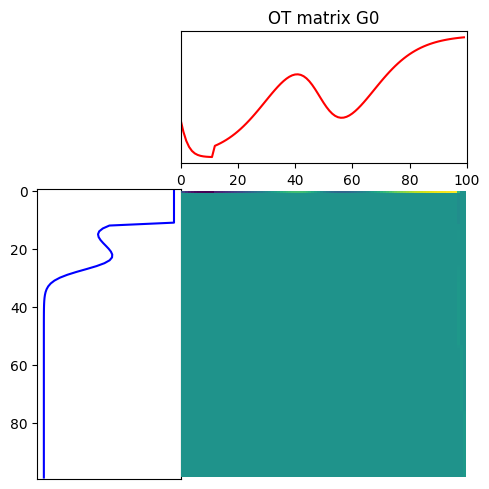

In [219]:
# use fast 1D solver
G0 = ot.emd_1d(x, x, a2, b2)

# Equivalent to
# G0 = ot.emd(a, b, M)

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a2, b2, G0, 'OT matrix G0')

It.  |Err         
-------------------
    0|3.361681e-01|
   10|2.737733e-01|
   20|2.172134e-01|
   30|1.683406e-01|
   40|1.299673e-01|
   50|1.008507e-01|
   60|7.878964e-02|
   70|6.192377e-02|
   80|4.889078e-02|
   90|3.872473e-02|
  100|3.073784e-02|
  110|2.443110e-02|
  120|1.943425e-02|
  130|1.546674e-02|
  140|1.231239e-02|
  150|9.802606e-03|
  160|7.804831e-03|
  170|6.214260e-03|
  180|4.947771e-03|
  190|3.939303e-03|
It.  |Err         
-------------------
  200|3.136298e-03|
  210|2.496914e-03|
  220|1.987829e-03|
  230|1.582505e-03|
  240|1.259803e-03|
  250|1.002891e-03|
  260|7.983603e-04|
  270|6.355350e-04|
  280|5.059134e-04|
  290|4.027261e-04|
  300|3.205833e-04|
  310|2.551937e-04|
  320|2.031409e-04|
  330|1.617050e-04|
  340|1.287208e-04|
  350|1.024644e-04|
  360|8.156361e-05|
  370|6.492613e-05|
  380|5.168233e-05|
  390|4.114001e-05|
It.  |Err         
-------------------
  400|3.274812e-05|
  410|2.606803e-05|
  420|2.075056e-05|
  430|1.651777e-05|
  4

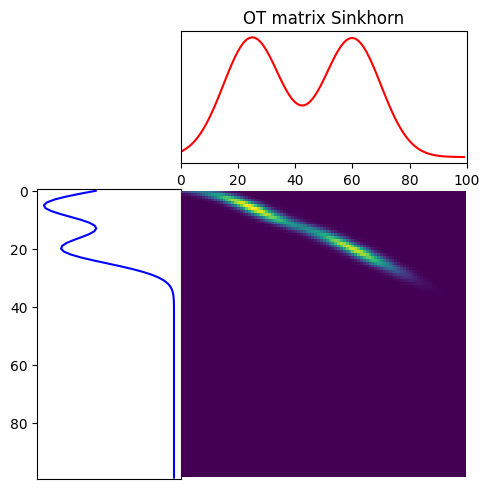

In [220]:
lambd = 1e-3
Gs = ot.sinkhorn(a, b, M, lambd, verbose=True)

pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'OT matrix Sinkhorn')

pl.show()

It.  |Err         
-------------------
    0|4.496642e+00|
   10|4.506987e+00|
   20|4.531612e+00|
   30|4.504672e+00|
   40|4.573700e+00|
   50|4.517309e+00|
   60|4.525145e+00|
   70|4.503462e+00|
   80|8.330698e+00|
   90|4.504062e+00|
  100|4.524048e+00|
  110|4.523062e+00|
  120|4.595642e+00|
  130|4.518949e+00|
  140|4.496474e+00|
  150|4.591140e+00|
  160|4.523568e+00|
  170|4.617049e+00|
  180|4.697912e+00|
  190|4.663334e+00|
It.  |Err         
-------------------
  200|4.869312e+00|
  210|4.535419e+00|
  220|4.531737e+00|
  230|4.540720e+00|
  240|4.590196e+00|


/usr/local/lib/python3.10/dist-packages/ot/bregman/_sinkhorn.py:498: RuntimeWarning: overflow encountered in divide
  v = b / KtransposeU
/usr/local/lib/python3.10/dist-packages/ot/bregman/_sinkhorn.py:506: UserWarning: Warning: numerical errors at iteration 241
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


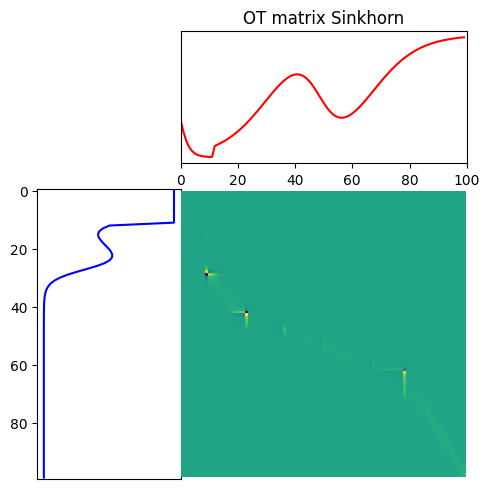

In [222]:
lambd = 1e-3
Gs = ot.sinkhorn(a2, b2, M, lambd, verbose=True)

pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a2, b2, Gs, 'OT matrix Sinkhorn')

pl.show()

In [302]:
# parameters

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a1 = ot.datasets.make_1D_gauss(n, m=20, s=5)  # m= mean, s= std
a1 += ot.datasets.make_1D_gauss(n, m=70, s=12)  # m= mean, s= std
a1 += ot.datasets.make_1D_gauss(n, m=30, s=3)  # m= mean, s= std
a1 += ot.datasets.make_1D_gauss(n, m=100, s=13)  # m= mean, s= std
a2 = ot.datasets.make_1D_gauss(n, m=60, s=8)
a2 += ot.datasets.make_1D_gauss(n, m=10, s=3)


# a1 -=.1
# a2 -=.1 # sadly cant have negative numbers!
# make unbalanced dists
a2 *= 3.

noise_cutoff=None

if noise_cutoff:
  a2[a2<.05]=0 # noise floor cutoff works!
  a1[a1<.05]=0

# creating matrix A containing all distributions
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

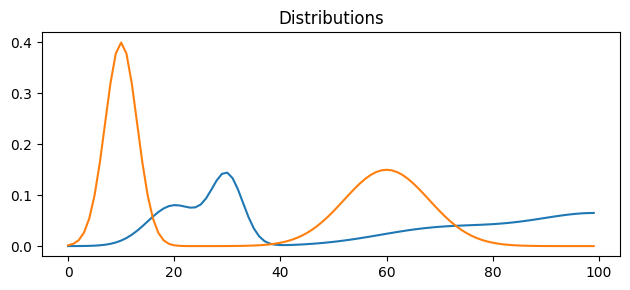

In [303]:
# plot the distributions

pl.figure(1, figsize=(6.4, 3))
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')
pl.tight_layout()

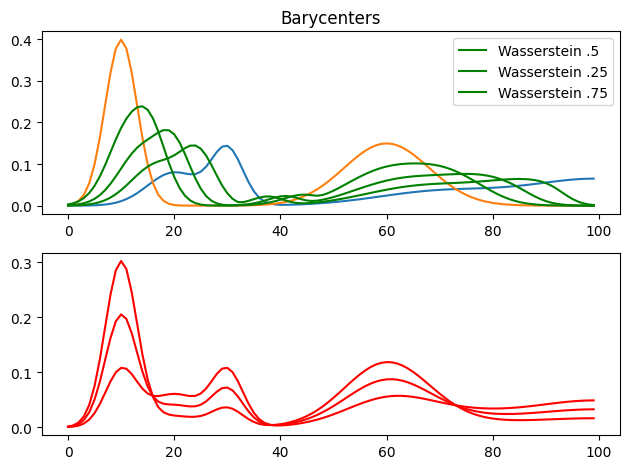

In [304]:
# non weighted barycenter computation

weight = 0.5  # 0<=weight<=1
weights = np.array([1 - weight, weight])
weights_25 = np.array([1 - .25, .25])
weights_75 = np.array([1 - .75, .75])


# l2bary
bary_l2 = A.dot(weights)
bary_l2_25 = A.dot(weights_25)
bary_l2_75 = A.dot(weights_75)

# wasserstein
reg = 1e-3
alpha = 1.

bary_wass = ot.unbalanced.barycenter_unbalanced(A, M, reg, alpha, weights=weights)
bary_wass_25 = ot.unbalanced.barycenter_unbalanced(A, M, reg, alpha, weights=weights_25)
bary_wass_75 = ot.unbalanced.barycenter_unbalanced(A, M, reg, alpha, weights=weights_75)

pl.figure(2)
pl.clf()
pl.subplot(2, 1, 1)
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')

pl.subplot(2, 1, 2)
pl.plot(x, bary_l2, 'r', label='l2 .5')
pl.plot(x, bary_l2_25, 'r', label='l2 .25')
pl.plot(x, bary_l2_75, 'r', label='l2 .75')
pl.subplot(2, 1, 1)
pl.plot(x, bary_wass, 'g', label='Wasserstein .5')
pl.plot(x, bary_wass_25, 'g', label='Wasserstein .25')
pl.plot(x, bary_wass_75, 'g', label='Wasserstein .75')
pl.legend()
pl.title('Barycenters')
pl.tight_layout()

In [283]:
import numpy as np
import matplotlib.pylab as pl
import ot
# necessary for 3d plot even if not used
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.collections import PolyCollection

<ipython-input-305-d1476399180f>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = pl.cm.get_cmap('viridis')
<ipython-input-305-d1476399180f>:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = pl.cm.get_cmap('viridis')


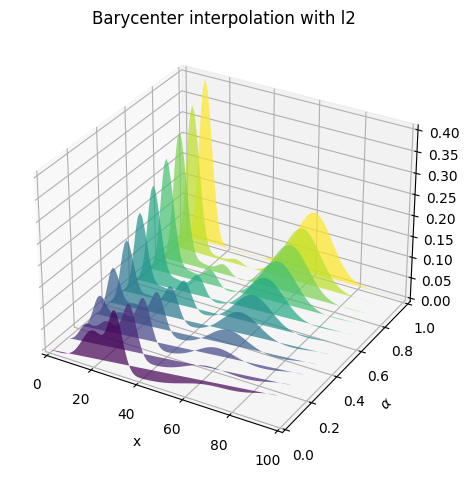

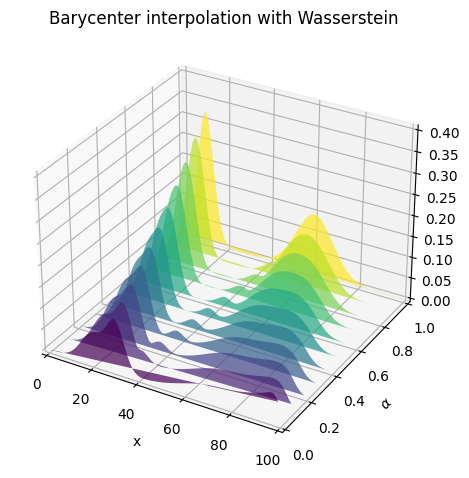

In [305]:
# barycenter interpolation

n_weight = 11
weight_list = np.linspace(0, 1, n_weight)


B_l2 = np.zeros((n, n_weight))

B_wass = np.copy(B_l2)

for i in range(0, n_weight):
    weight = weight_list[i]
    weights = np.array([1 - weight, weight])
    B_l2[:, i] = A.dot(weights)
    B_wass[:, i] = ot.unbalanced.barycenter_unbalanced(A, M, reg, alpha, weights=weights)


# plot interpolation

pl.figure(3)

cmap = pl.cm.get_cmap('viridis')
verts = []
zs = weight_list
for i, z in enumerate(zs):
    ys = B_l2[:, i]
    verts.append(list(zip(x, ys)))

ax = pl.gcf().add_subplot(projection='3d')

poly = PolyCollection(verts, facecolors=[cmap(a) for a in weight_list])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('x')
ax.set_xlim3d(0, n)
ax.set_ylabel(r'$\alpha$')
ax.set_ylim3d(0, 1)
ax.set_zlabel('')
ax.set_zlim3d(0, B_l2.max() * 1.01)
pl.title('Barycenter interpolation with l2')
pl.tight_layout()

pl.figure(4)
cmap = pl.cm.get_cmap('viridis')
verts = []
zs = weight_list
for i, z in enumerate(zs):
    ys = B_wass[:, i]
    verts.append(list(zip(x, ys)))

ax = pl.gcf().add_subplot(projection='3d')

poly = PolyCollection(verts, facecolors=[cmap(a) for a in weight_list])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('x')
ax.set_xlim3d(0, n)
ax.set_ylabel(r'$\alpha$')
ax.set_ylim3d(0, 1)
ax.set_zlabel('')
ax.set_zlim3d(0, B_l2.max() * 1.01)
pl.title('Barycenter interpolation with Wasserstein')
pl.tight_layout()

pl.show()

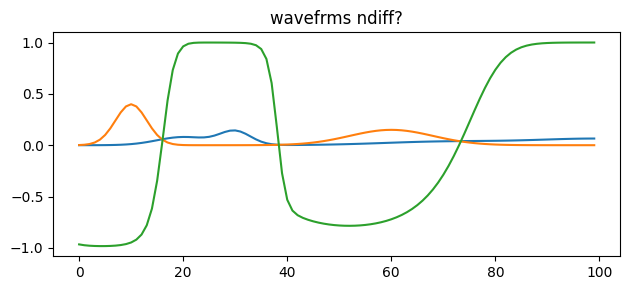

In [325]:
e = A[:, 0]
d = A[:, 1]
# Anorm= np.log(np.abs((e-d)/(e+d))+1)
Anorm= (e-d)/(e+d)
# Anorm += 1
# Anorm /= Anorm.max()

pl.figure(1, figsize=(6.4, 3))
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.plot(Anorm)
pl.title('wavefrms ndiff?')
pl.tight_layout()